# 서울시 주유소별 가격 분석

#### 라이브러리 선언

In [15]:
import pandas as pd
import numpy as np

#### 데이터 불러오기

In [2]:
gas_raw = pd.read_excel('c:/data/gas.xls', encoding = 'euc-kr')

#### 데이터 프레임화

In [5]:
gas = pd.DataFrame({'상호':gas_raw['상호'],
                   '주소':gas_raw['주소'],
                   '가격':gas_raw['휘발유'],
                   '셀프':gas_raw['셀프여부'],
                   '상표':gas_raw['상표']})
gas

,상호,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1585,N,현대오일뱅크
1,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595,Y,GS칼텍스
2,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,SK에너지
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1596,N,현대오일뱅크
4,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1598,N,GS칼텍스
...,...,...,...,...,...
496,금성주유소,서울 강남구 테헤란로 619 (삼성동),1999,N,SK에너지
497,오천주유소,서울 강남구 봉은사로 503 (삼성동),1999,N,SK에너지
498,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218,N,SK에너지
499,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지


#### 데이터 정보 확인하기

In [6]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
상호    501 non-null object
주소    501 non-null object
가격    501 non-null object
셀프    501 non-null object
상표    501 non-null object
dtypes: object(5)
memory usage: 19.7+ KB


#### 주소 칼럼으로부터 구별 칼럼 만들기

In [7]:
gu = []
for add in gas['주소']:
    gu.append(add.split()[1])
gas['구별'] = gu
gas.head(5)

,상호,주소,가격,셀프,상표,구별
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1585,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595,Y,GS칼텍스,강동구
2,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,SK에너지,강동구
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1596,N,현대오일뱅크,강동구
4,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1598,N,GS칼텍스,강동구


#### 구별 칼럼 이상 유무 확인

In [9]:
gas['구별'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

#### 가격 컬럼 이상 유무 확인

In [10]:
gas['가격'].unique()

array([1585, 1595, 1596, 1598, 1615, 1625, 1627, 1628, 1629, 1648, 1658,
       1698, 1998, 1522, 1525, 1555, 1558, 1559, 1565, 1569, 1574, 1575,
       1599, 1608, 1609, 1618, 1639, 1695, 1750, 1564, 1675, '1627',
       '1628', '1637', '1638', '1677', '1679', '1859', '1898', '1919',
       '1969', '-', 1563, 1568, 1579, 1582, 1593, 1738, 2197, 1519, 1578,
       1586, 1588, 1594, 1597, 1607, 1610, 1616, 1635, 1647, 1649, 1665,
       1667, 1669, 1689, 1697, 1978, 1999, 2063, '1544', '1548', '1562',
       '1583', '1598', '1599', '1615', '1625', '1665', '1675', '1770',
       '1823', '1968', '1492', '1512', '1519', '1527', '1532', '1538',
       '1539', '1545', '1547', '1549', '1558', '1559', '1578', '1589',
       '1629', '1645', 1545, 1549, 1554, 1557, 1573, 1589, 1659, 1679,
       1819, '1525', '1528', '1565', '1567', '1568', '1579', '1649',
       '1673', '1829', '1887', 1529, 1539, 1544, 1840, 1873, 1940, 1976,
       1979, 1993, 1509, 1535, 1538, 1547, 1548, 1779, 1897, 1934, 1

#### -로 표시된 가격 행 삭제 후 float으로 전환

In [11]:
gas = gas[gas['가격'] != '-']
gas['가격'] = gas['가격'].astype('float')
gas

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,상호,주소,가격,셀프,상표,구별
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1585.0,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595.0,Y,GS칼텍스,강동구
2,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596.0,N,SK에너지,강동구
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1596.0,N,현대오일뱅크,강동구
4,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1598.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...
494,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335 (대치동),1998.0,N,GS칼텍스,강남구
495,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1999.0,N,GS칼텍스,강남구
496,금성주유소,서울 강남구 테헤란로 619 (삼성동),1999.0,N,SK에너지,강남구
497,오천주유소,서울 강남구 봉은사로 503 (삼성동),1999.0,N,SK에너지,강남구


기존 인덱스 삭제

In [13]:
gas.reset_index(inplace = True)
gas.head(5)
del gas['index']

In [14]:
gas.head(3)

,level_0,상호,주소,가격,셀프,상표,구별
0,0,구천면주유소,서울 강동구 구천면로 357 (암사동),1585.0,N,현대오일뱅크,강동구
1,1,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595.0,Y,GS칼텍스,강동구
2,2,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596.0,N,SK에너지,강동구


pivot table을 활용하여 서울시 구별 휘발유 가격 정보 표시

In [16]:
gu_data = pd.pivot_table(gas, index=['구별'], values=['가격'], aggfunc=np.mean)
gu_data.sort_values(by = '가격', ascending = False).head()

,가격
구별,
중구,2063.750000
용산구,1989.285714
종로구,1898.777778
강남구,1772.900000
마포구,1753.100000


================================================================================================================

# 데이터 시각화 실습

In [19]:
import matplotlib.pyplot as plt

In [17]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

In [18]:
df = pd.read_excel('c:/data/scores.xls', index_col=0)
df

,국어,영어,수학
철수,84,87,78
영이,21,15,84
길동,87,84,76
미영,100,87,99
순이,59,99,59
철이,46,77,56


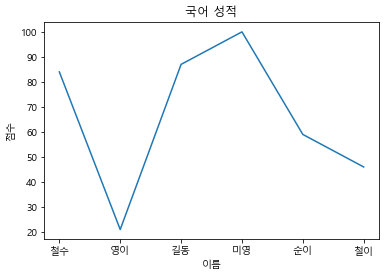

In [22]:
plt.plot(df.index, df['국어'])
plt.title('국어 성적')
plt.xlabel('이름')
plt.ylabel('점수')
plt.show()

꾸미기 옵션 사용해보기

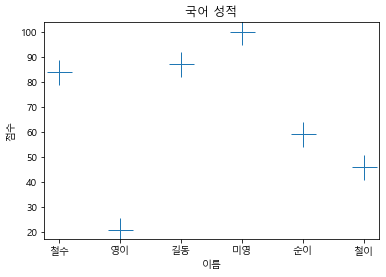

In [28]:
plt.plot(df.index, df['국어'], 'o', marker = '+', markersize = '25', markerfacecolor = 'purple')
plt.title('국어 성적')
plt.xlabel('이름')
plt.ylabel('점수')
plt.show()

한번에 그래프 여러개 그리기

Text(0.5, 0.98, '학생 과목별 성적')

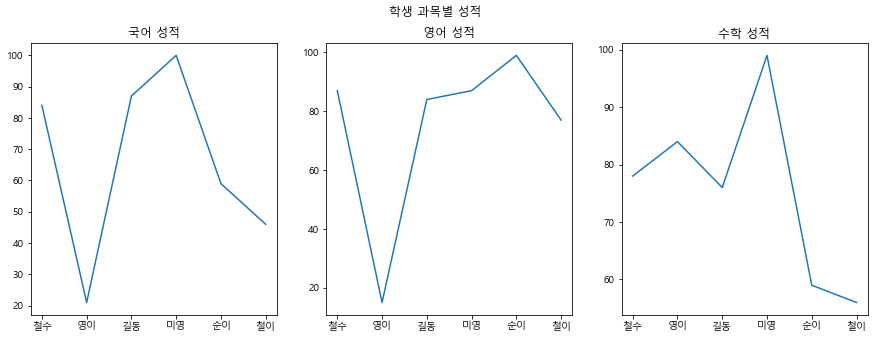

In [41]:
fig = plt.figure(figsize=(15,5))
sub1 = fig.add_subplot(1,3,1)
sub2 = fig.add_subplot(1,3,2)
sub3 = fig.add_subplot(1,3,3)

sub1.plot(df.index, df['국어'])
sub1.set_title('국어 성적')
sub2.plot(df.index, df['영어'])
sub2.set_title('영어 성적')
sub3.plot(df.index, df['수학'])
sub3.set_title('수학 성적')

fig
fig.suptitle('학생 과목별 성적')

면적 그래프

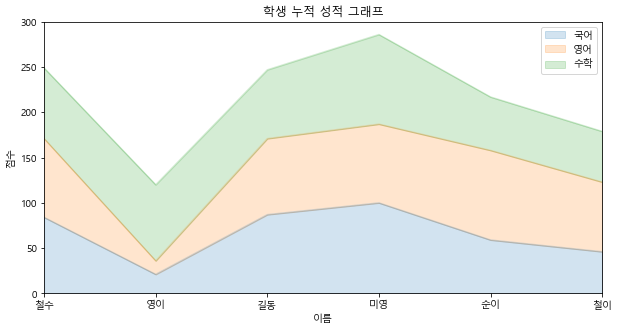

In [44]:
df.plot(kind = 'area', alpha = 0.2, figsize=(10,5))
plt.title('학생 누적 성적 그래프')
plt.xlabel('이름')
plt.ylabel('점수')
plt.show()

막대 그래프

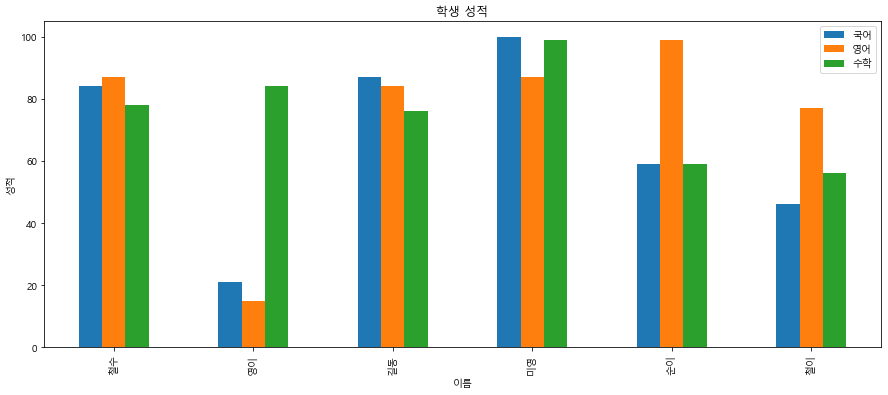

In [46]:
df.plot(kind = 'bar', figsize = (15,6))
plt.title('학생 성적')
plt.xlabel('이름')
plt.ylabel('성적')
plt.show()

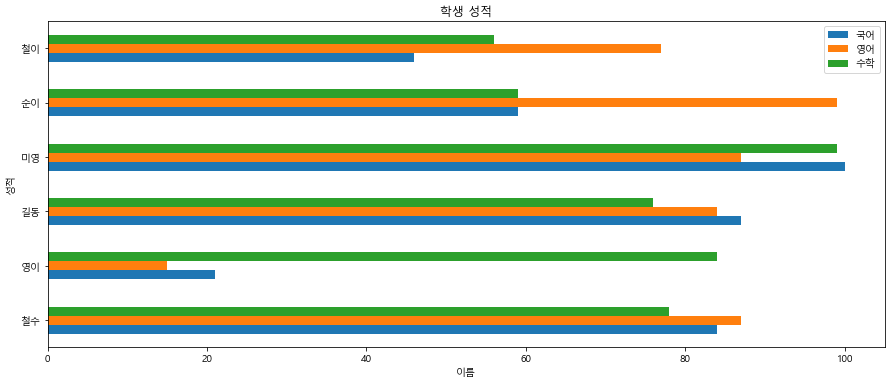

In [47]:
df.plot(kind = 'barh', figsize = (15,6))
plt.title('학생 성적')
plt.xlabel('이름')
plt.ylabel('성적')
plt.show()

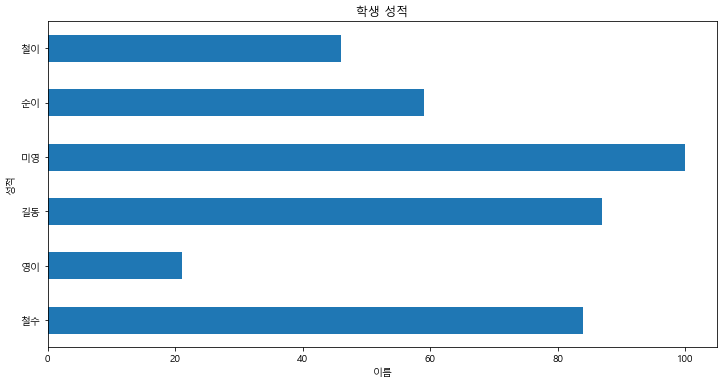

In [50]:
df['국어'].plot(kind = 'barh', figsize = (12,6))
plt.title('학생 성적')
plt.xlabel('이름')
plt.ylabel('성적')
plt.show()

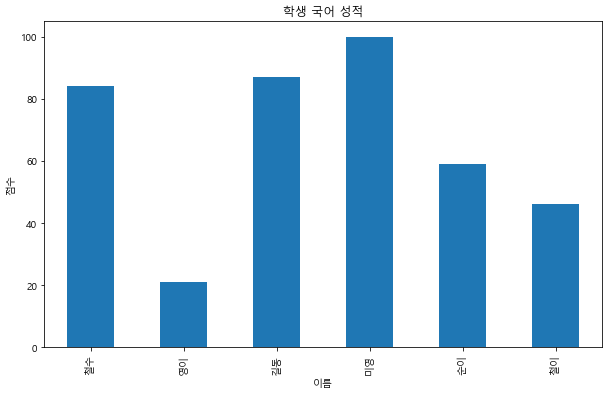

In [54]:
df['국어'].plot(kind = 'bar', figsize = (10,6))
plt.title('학생 국어 성적')
plt.xlabel('이름')
plt.ylabel('점수')
plt.show()

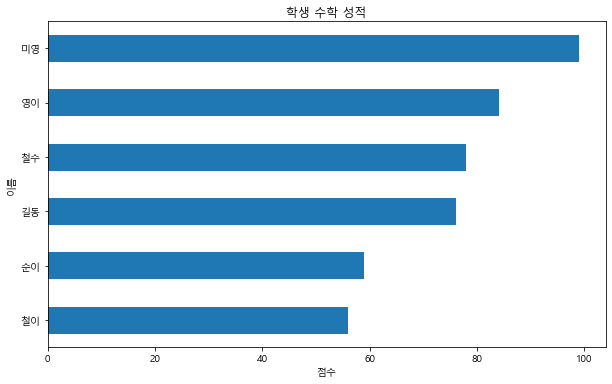

In [59]:
df.sort_values(by = '수학', ascending = True, inplace = True)
df['수학'].plot(kind = 'barh', figsize = (10,6))
plt.title('학생 수학 성적')
plt.xlabel('점수')
plt.ylabel('이름')
plt.show()

히스토그램

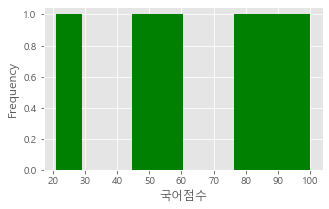

In [60]:
plt.style.use('ggplot')
df['국어'].plot(kind = 'hist', bins = 10, color = 'green', figsize = (5,3))
plt.xlabel('국어점수')
plt.show()

In [61]:
import seaborn as sns

#### tips 데이터 불러오기

In [62]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


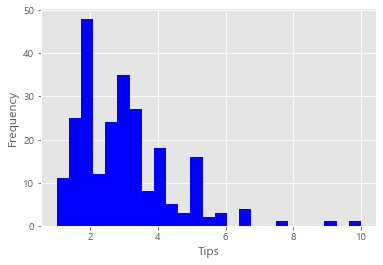

In [73]:
tips['tip'].plot(kind= 'hist', bins = 25, figsize = (6,4), color = 'blue')
plt.xlabel('Tips')
plt.show()

산점도 scatter

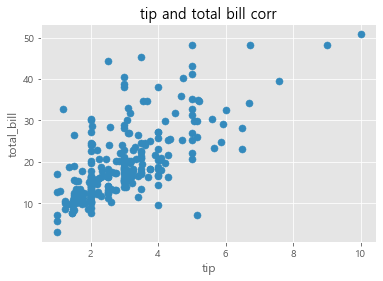

In [77]:
tips.plot(kind = 'scatter', x = 'tip', y = 'total_bill', s=50)
plt.title('tip and total bill corr')
plt.show()

In [96]:
tips1 = tips
tips1['count'] = 1
tips1

,total_bill,tip,sex,smoker,day,time,size,count,billperPerson
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0.007737
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0.004709
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0.009567
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0.010783
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0.011198
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0.013219
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0.012377
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0.010323
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0.008115


In [98]:
del tips1['billperPerson']

In [103]:
tips2 = tips1.groupby(['sex', 'smoker']).sum()
tips2

total_bill     tip  size  count
sex    smoker                                 
Male   Yes        1337.07  183.07   150     60
       No         1919.75  302.00   263     97
Female Yes         593.27   96.74    74     33
       No          977.68  149.77   140     54

pie 차트

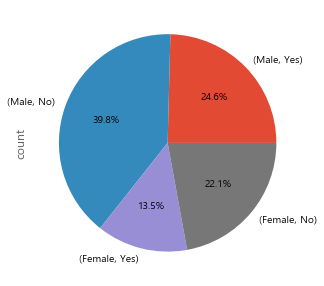

In [104]:
tips2['count'].plot(kind = 'pie', figsize = (7,5), autopct = '%.1f%%', startangle = 0)
plt.show()

box plot

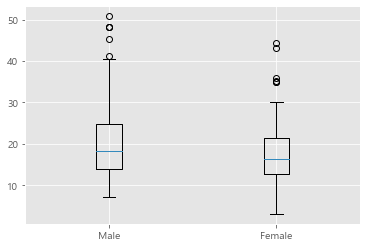

In [110]:
plt.boxplot(x = [tips1[tips1['sex'] == 'Male']['total_bill'],
                tips1[tips1['sex'] == 'Female']['total_bill']],
           labels = ['Male', 'Female'])
plt.show()

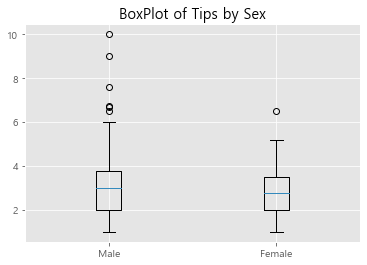

In [114]:
plt.boxplot(x = [tips1[tips1['sex'] == 'Male']['tip'],
                tips1[tips1['sex'] == 'Female']['tip']],
           labels = ['Male', 'Female'])
plt.title('BoxPlot of Tips by Sex')
plt.show()

In [111]:
tips1['total_bill'].max()

50.81

In [113]:
tips1['tip'].max()

10.0

회귀선

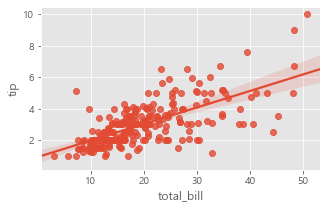

In [118]:
plt.figure(figsize=(5,3))
sns.regplot(x = 'total_bill', y = 'tip', data = tips1)
plt.show()

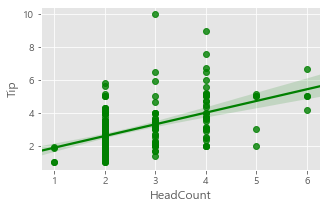

In [117]:
plt.figure(figsize=(5,3))
sns.regplot(x = 'size', y = 'tip', data = tips1, color = 'green')
plt.xlabel('HeadCount')
plt.ylabel('Tip')
plt.show()

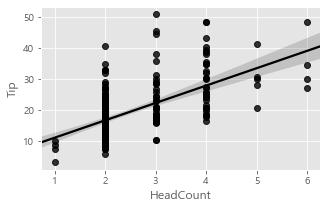

In [120]:
plt.figure(figsize=(5,3))
sns.regplot(x = 'size', y = 'total_bill', data = tips1, color = 'black')
plt.xlabel('HeadCount')
plt.ylabel('Tip')
plt.show()

<Figure size 360x216 with 0 Axes>

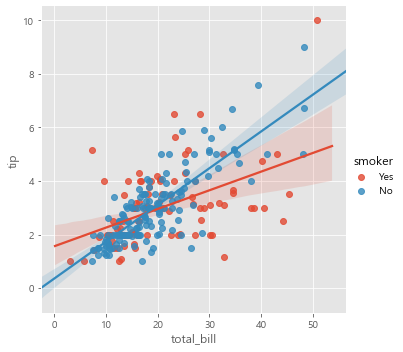

In [122]:
plt.figure(figsize = (5,3))
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips1)
plt.show()

히스토그램/커널 밀도 그래프

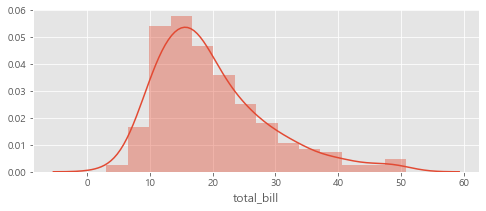

In [125]:
plt.figure(figsize=(8,3))
sns.distplot(tips1['total_bill'])
plt.show()

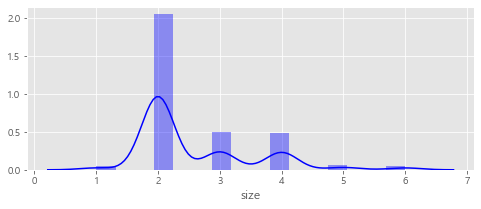

In [128]:
plt.figure(figsize=(8,3))
sns.distplot(tips1['size'], color='blue')
plt.show()

In [126]:
tips1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
count         244 non-null int64
dtypes: category(4), float64(2), int64(2)
memory usage: 9.2 KB


In [131]:
tips1['day'] = tips1['day'].astype('category')
tips1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
count         244 non-null int64
dtypes: category(4), float64(2), int64(2)
memory usage: 9.2 KB


히트맵

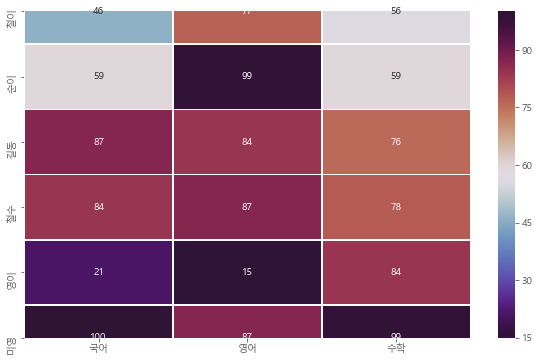

In [141]:
plt.figure(figsize=(10,6))
sns.heatmap(df, annot=True, fmt = 'd', cmap = 'twilight_shifted', linewidth = 0.5)
plt.show()

범주형 데이터의 산점도

In [144]:
df['성별'] = ['남', '여', '남', '남', '여', '여']
df

,국어,영어,수학,성별
철이,46,77,56,남
순이,59,99,59,여
길동,87,84,76,남
철수,84,87,78,남
영이,21,15,84,여
미영,100,87,99,여


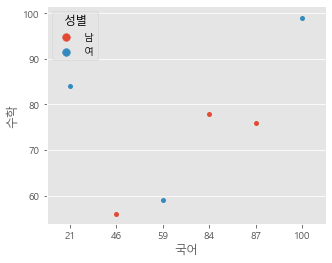

In [146]:
plt.figure(figsize=(5,4))
sns.swarmplot(x = '국어', y = '수학', data = df, hue = '성별')
plt.show()

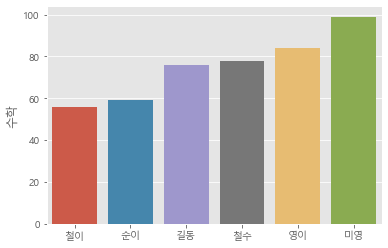

In [150]:
plt.figure(figsize=(6,4))
sns.barplot(x = df.index , y = '수학', data = df)
plt.show()

빈도 그래프

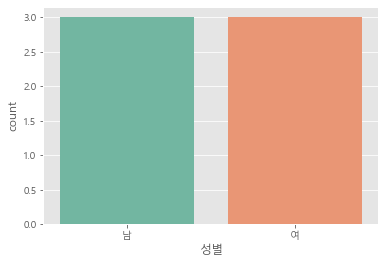

In [157]:
plt.figure(figsize=(6,4))
sns.countplot(x = '성별', palette='Set2', data= df)
plt.show()

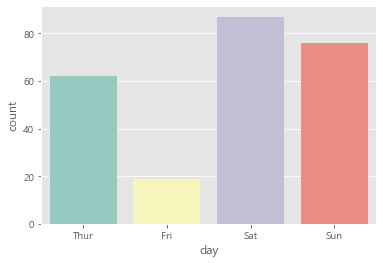

In [169]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'day', palette='Set3',data= tips, order = ['Thur', 'Fri', 'Sat', 'Sun'])
plt.show()

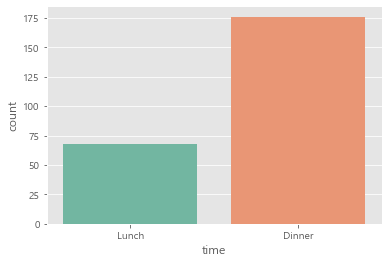

In [161]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'time', palette='Set2', data= tips)
plt.show()

seaborn boxplot

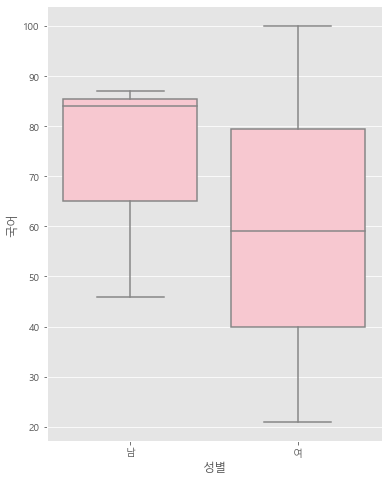

In [175]:
plt.figure(figsize=(6,8))
sns.boxplot(x = '성별', y = '국어', data= df, color='pink')
plt.show()

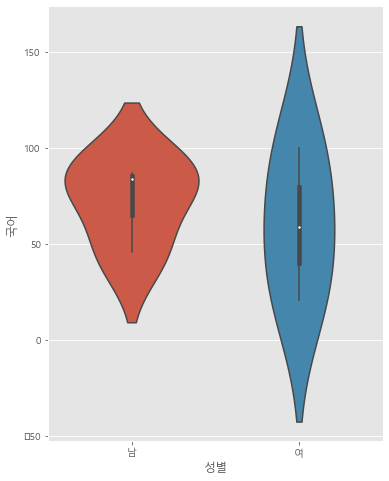

In [177]:
plt.figure(figsize=(6,8))
sns.violinplot(x = '성별', y = '국어', data= df)
plt.show()

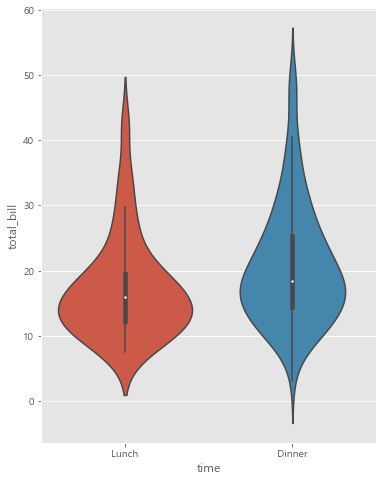

In [179]:
plt.figure(figsize=(6,8))
sns.violinplot(x = 'time', y = 'total_bill', data= tips1)
plt.show()

<Figure size 576x432 with 0 Axes>

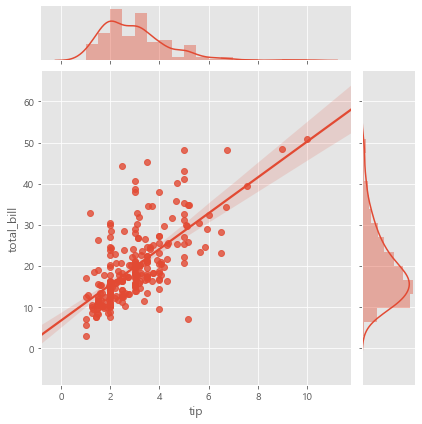

In [180]:
plt.figure(figsize=(8,6))
sns.jointplot(x = 'tip', y = 'total_bill', kind = 'reg', data = tips1)
plt.show()

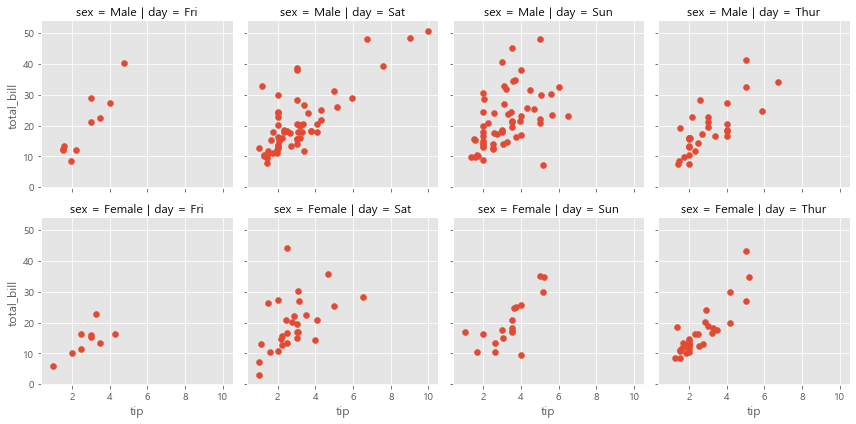

In [184]:
g = sns.FacetGrid(data=tips1, col='day', row = 'sex')
g = g.map(plt.scatter, 'tip', 'total_bill')

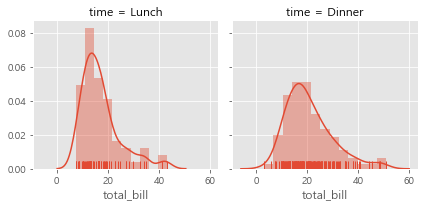

In [193]:
g = sns.FacetGrid(data=tips1, col='time')
g = g.map(sns.distplot, 'total_bill', rug = True)
plt.show()

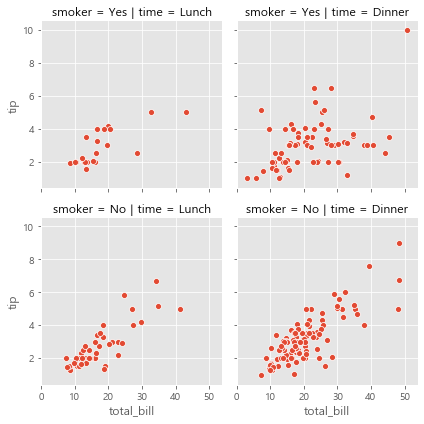

In [195]:
g = sns.FacetGrid(data=tips1, col='time', row = 'smoker')
g = g.map(sns.scatterplot, 'total_bill', 'tip')
plt.show()

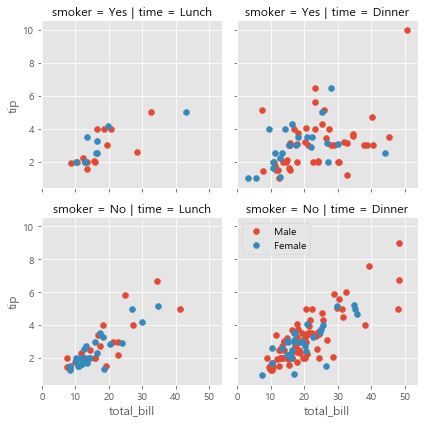

In [198]:
g = sns.FacetGrid(data=tips, col = 'time', row = 'smoker', hue = 'sex')
g.map(plt.scatter, 'total_bill', 'tip')
plt.legend()
plt.show()

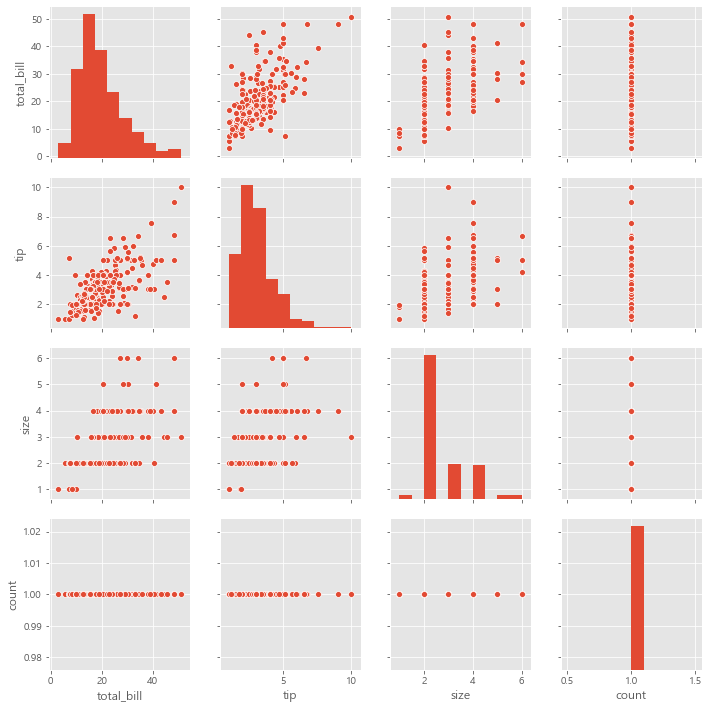

In [199]:
sns.pairplot(tips1)
plt.show()

====================================================================================================================

# 공공데이터 분석:  
### CCTV와 인구수

#### 데이터 불러오기

In [202]:
pop_cc = pd.read_excel('c:/data/pop_cc.xlsx')
pop_cc

,구별,인구수,한국인,외국인,고령인,cctv수,2013년이전,2014년,2015년,2016년,2017년,인구수대비cctv수,외국인수대비cctv수,고령인수대비cctv수,인구수대비cctv비율,외국인수대비cctv비율,고령인수대비cctv비율
0,강남구,546875,541854,5021,68104,4758,1979,474,760,770,775,0.870034,94.762000,6.986374,0.870034,94.762000,6.986374
1,강동구,429601,425267,4334,59742,1493,1028,73,142,240,10,0.347532,34.448546,2.499079,0.347532,34.448546,2.499079
2,강북구,321151,317386,3765,58858,946,472,70,147,257,0,0.294565,25.126162,1.607258,0.294565,25.126162,1.607258
3,강서구,602886,596287,6599,80903,1202,634,52,177,168,171,0.199374,18.214881,1.485730,0.199374,18.214881,1.485730
4,관악구,520645,502615,18030,73005,3223,1511,406,593,352,361,0.619040,17.875763,4.414766,0.619040,17.875763,4.414766
5,광진구,370658,354873,15785,46288,1228,1025,85,62,19,37,0.331303,7.779538,2.652955,0.331303,7.779538,2.652955
6,구로구,438889,404726,34163,63017,2746,1434,189,256,326,541,0.625671,8.037936,4.357554,0.625671,8.037936,4.357554
7,금천구,254244,233981,20263,36301,1526,922,91,305,109,99,0.600211,7.530968,4.203741,0.600211,7.530968,4.203741
8,노원구,545486,541174,4312,78170,1576,627,80,461,298,110,0.288917,36.549165,2.016119,0.288917,36.549165,2.016119
9,도봉구,340089,337820,2269,56742,899,480,185,49,102,83,0.264343,39.620978,1.584364,0.264343,39.620978,1.584364


구별 인구수

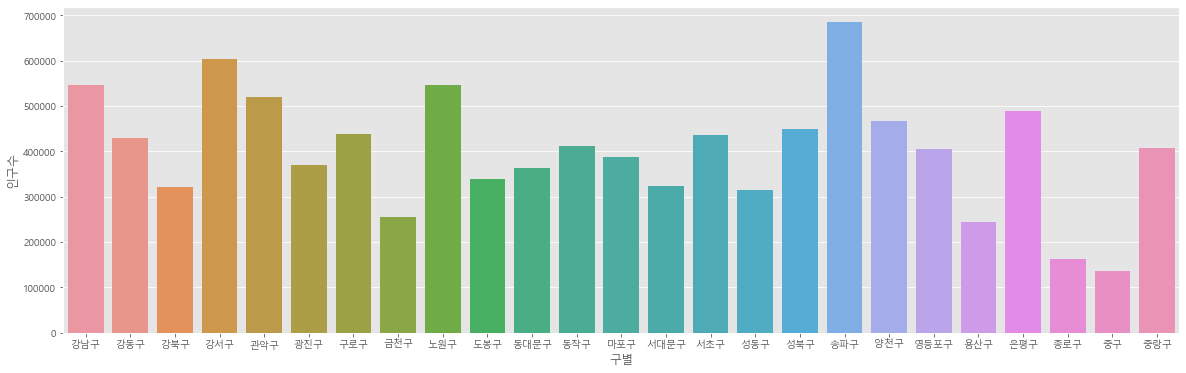

In [206]:
plt.figure(figsize=(20,6))
sns.barplot(x = '구별', y = '인구수', data = pop_cc)
plt.show()

구별 cctv수

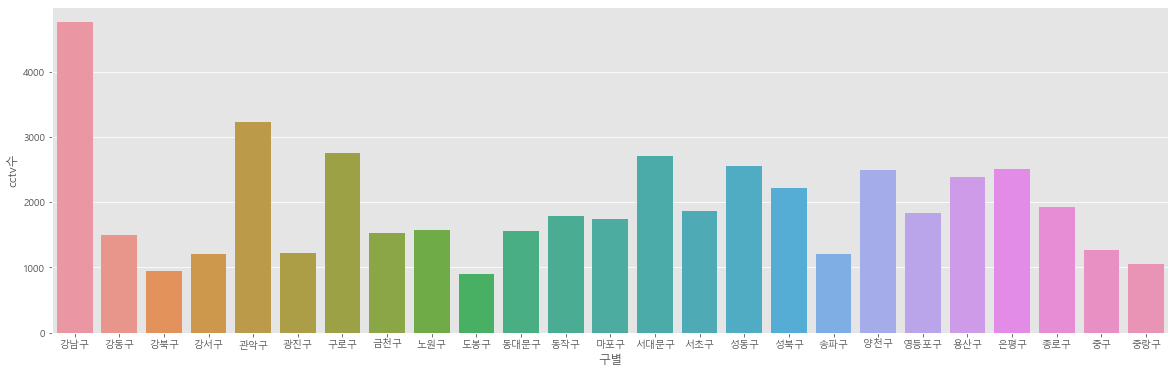

In [207]:
plt.figure(figsize=(20,6))
sns.barplot(x = '구별', y = 'cctv수', data = pop_cc)
plt.show()

인구수와 cctv수와의 관계

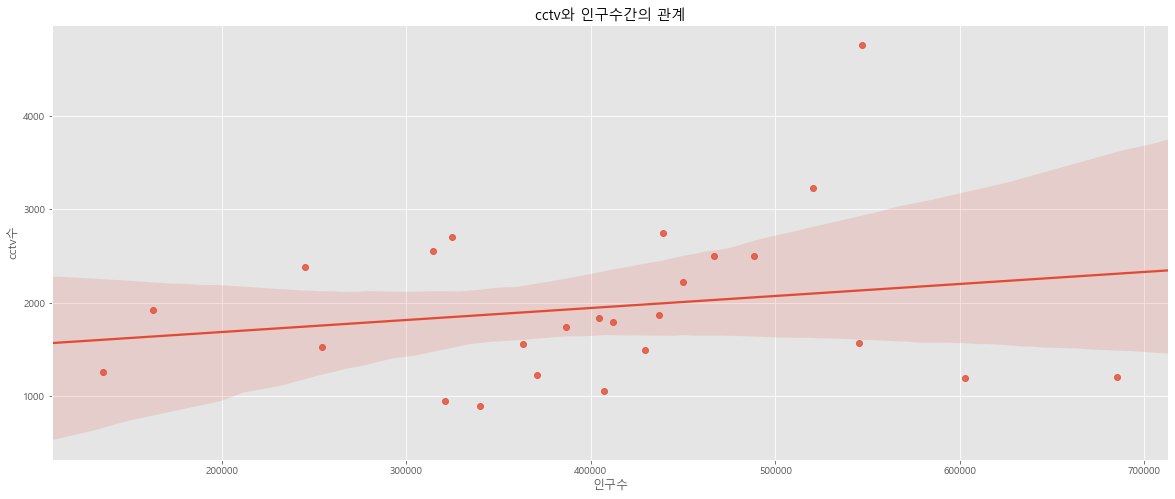

In [209]:
plt.figure(figsize=(20,8))
sns.regplot(x = '인구수', y = 'cctv수', data = pop_cc)
plt.title('cctv와 인구수간의 관계')
plt.show()

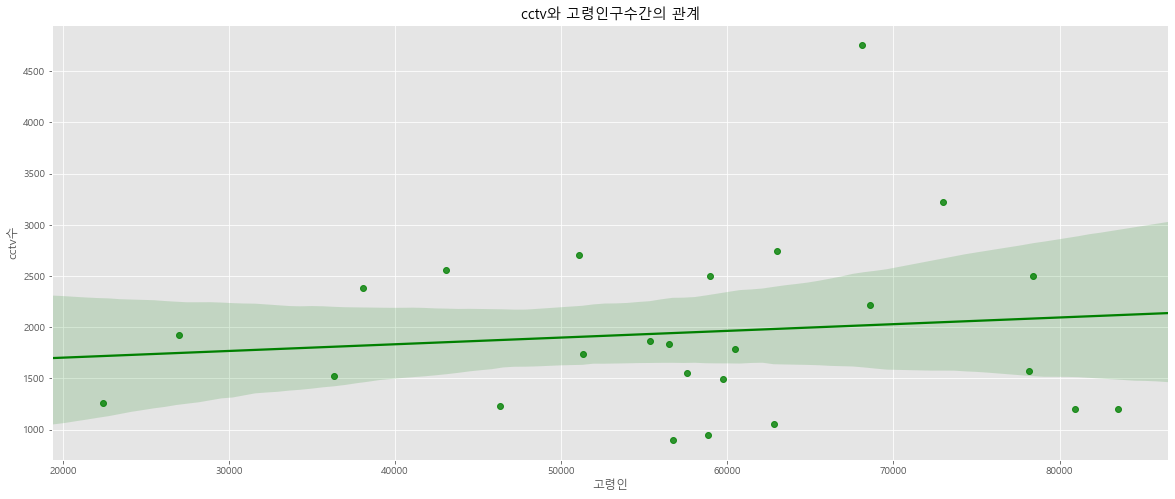

In [211]:
plt.figure(figsize=(20,8))
sns.regplot(x = '고령인', y = 'cctv수', data = pop_cc, color='green')
plt.title('cctv와 고령인구수간의 관계')
plt.show()

==================================================================================================================

## 타이타닉 데이터 분석 실습

### 데이터 불러오기

In [212]:
tit = sns.load_dataset('titanic')
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


데이터 자료형 파악

In [213]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [214]:
tit['count'] = 1
tit.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,count
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [217]:
tit_s = tit.groupby(['alive']).sum()
tit_s

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,count
alive,,,,,,,,,
no,0,1390,12985.50,304,181,12142.7199,449.0,374.0,549
yes,342,667,8219.67,162,159,16551.2294,88.0,163.0,342


사망자와 생존자 비율

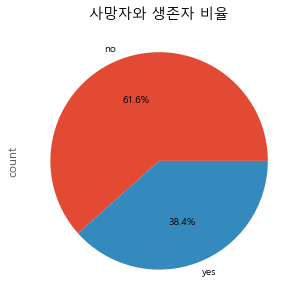

In [220]:
tit_s['count'].plot(kind = 'pie', figsize = (8,5), autopct = '%.1f%%', startangle = 0)
plt.title('사망자와 생존자 비율')
plt.show()

In [232]:
tit_p = tit.groupby(['pclass']).sum()
tit_p

,survived,age,sibsp,parch,fare,adult_male,alone,count
pclass,,,,,,,,
1,136,7111.42,90,77,18177.4125,119.0,109.0,216
2,87,5168.83,74,70,3801.8417,99.0,104.0,184
3,119,8924.92,302,193,6714.6951,319.0,324.0,491


pclass와 생존률과의 관계

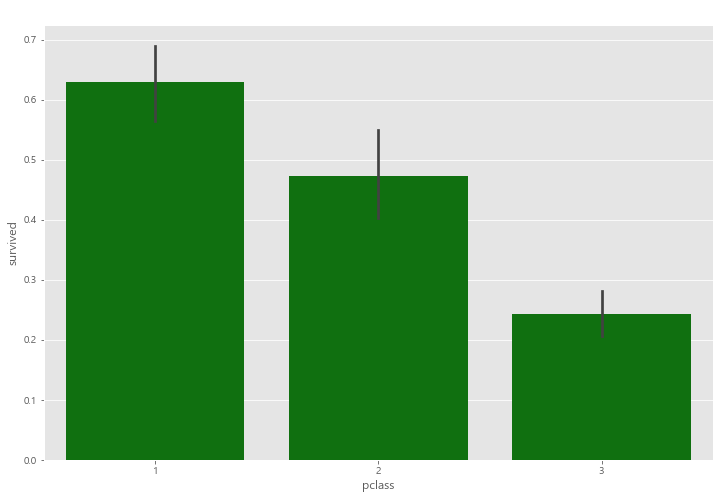

In [238]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'pclass', y = 'survived', data = tit, color='green')
plt.title(' ')
plt.show()

In [239]:
tit_sex = tit.groupby(['sex']).sum()
tit_sex

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,count
sex,,,,,,,,,
female,233,678,7286.00,218,204,13966.6628,0.0,126.0,314
male,109,1379,13919.17,248,136,14727.2865,537.0,411.0,577


여성의 생존률

In [246]:
tit_sex.loc['female']['survived']/tit_sex.loc['female']['count']*100

74.20382165605095

남성의 생존률

In [247]:
tit_sex.loc['male']['survived']/tit_sex.loc['male']['count']*100

18.890814558058924

In [254]:
tit_age = tit[['age', 'survived', 'alive','count']]
tit_age

,age,survived,alive,count
0,22.0,0,no,1
1,38.0,1,yes,1
2,26.0,1,yes,1
3,35.0,1,yes,1
4,35.0,0,no,1
...,...,...,...,...
886,27.0,0,no,1
887,19.0,1,yes,1
888,NaN,0,no,1
889,26.0,1,yes,1


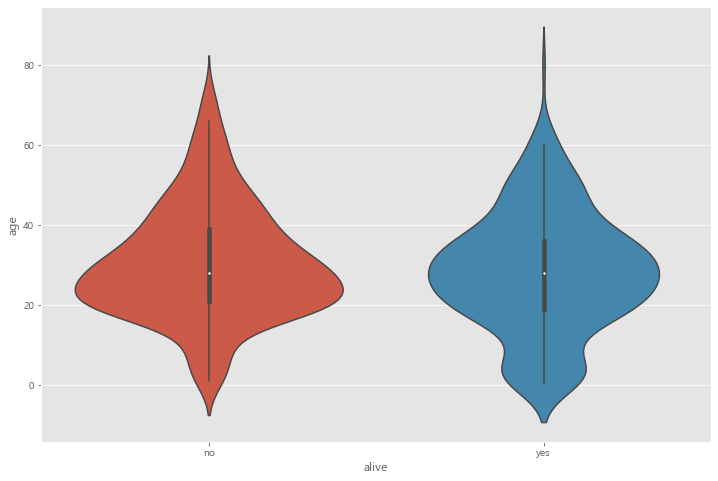

In [256]:
plt.figure(figsize=(12,8))
sns.violinplot(x = 'alive', y = 'age', data = tit_age)
plt.show()